***
***
# 计算思维：奥运会比赛数据分析
***
***

王成军 

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm

matplotlib.style.use('fivethirtyeight')

In [3]:
game = pd.read_csv('summer.csv')
country = pd.read_csv('dictionary.csv')
# https://www.kaggle.com/the-guardian/olympic-games

In [4]:
import warnings 
warnings.filterwarnings('ignore')

game['gold']=0
game['silver']=0
game['bronze']=0
game['gold'][game['Medal']=='Gold'] = 1
game['silver'][game['Medal']=='Silver'] = 1
game['bronze'][game['Medal']=='Bronze'] = 1
game['score']=0
game['score'][game['Medal']=='Gold'] = 4
game['score'][game['Medal']=='Silver'] = 2
game['score'][game['Medal']=='Bronze'] = 1

In [5]:
country[:5]

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [6]:
game[:3]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,gold,silver,bronze,score
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1,0,0,4
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0,1,0,2
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,0,0,1,1


In [7]:
'，'.join(game.columns)

'Year，City，Sport，Discipline，Athlete，Country，Gender，Event，Medal，gold，silver，bronze，score'

黑人从游泳项目当中消失了

# 金牌得分的垄断程度

In [11]:
!pip install powerlaw

  Obtaining dependency information for powerlaw from https://files.pythonhosted.org/packages/e8/26/e0daa306f83d705bc1ed4d6759b7fc945cc787530c230ee1fe299cc28093/powerlaw-1.5-py3-none-any.whl.metadata
  Using cached powerlaw-1.5-py3-none-any.whl.metadata (9.3 kB)
Using cached powerlaw-1.5-py3-none-any.whl (24 kB)


In [12]:
import powerlaw
def plotPowerlaw(data,ax,col,xlab):
    fit = powerlaw.Fit(data,xmin=1)
    #fit = powerlaw.Fit(data)
    fit.plot_pdf(color = col, linewidth = 2)
    a,x = (fit.power_law.alpha,fit.power_law.xmin)
    fit.power_law.plot_pdf(color = col, linestyle = 'dotted', ax = ax, \
                            label = r"$\alpha = %d \:\:, x_{min} = %d$" % (a,x))
    ax.set_xlabel(xlab, fontsize = 20)
    ax.set_ylabel('$Probability$', fontsize = 20)
    plt.legend(loc = 0, frameon = False)
    
def plotCCDF(data,ax,col,xlab):
    fit = powerlaw.Fit(data,xmin=1)
    #fit = powerlaw.Fit(data)
    fit.plot_ccdf(color = col, linewidth = 2)
    a,x = (fit.power_law.alpha,fit.power_law.xmin)
    fit.power_law.plot_ccdf(color = col, linestyle = 'dotted', ax = ax, \
                            label = r"$\alpha = %d \:\:, x_{min} = %d$" % (a,x))
    ax.set_xlabel(xlab, fontsize = 16)
    ax.set_ylabel('$CCDF$', fontsize = 16)
    plt.legend(loc = 0, frameon = False)
    

In [13]:
gsb = game.groupby(['Country']).sum()[['gold', 'silver', 'bronze', 'score']]

In [14]:
gsb = gsb.sort_values(['score'], ascending = False)
gsb[:20]

,gold,silver,bronze,score
Country,,,,
USA,2235,1252,1098,12542
URS,838,627,584,5190
GBR,546,621,553,3979
ITA,476,416,404,3140
FRA,408,491,497,3111
GER,452,378,475,3039
HUN,412,316,351,2631
AUS,312,405,472,2530
SWE,349,367,328,2458


In [16]:
#help(gsb.merge)

In [17]:
gsb = gsb.merge(country, how = 'left', right_on = 'Code', left_index= True)
gsb[:20]

,gold,silver,bronze,score,Country,Code,Population,GDP per Capita
191.0,2235,1252,1098,12542,United States,USA,321418820.0,56115.718426
NaN,838,627,584,5190,NaN,URS,NaN,NaN
190.0,546,621,553,3979,United Kingdom,GBR,65138232.0,43875.969614
90.0,476,416,404,3140,Italy,ITA,60802085.0,29957.804315
66.0,408,491,497,3111,France,FRA,66808385.0,36205.568102
...,...,...,...,...,...,...,...,...
53.0,0,0,1,1,Djibouti,DJI,887861.0,1945.124293
109.0,0,0,1,1,Macedonia,MKD,2078453.0,4852.657848
14.0,0,0,1,1,Bahrain,BRN,1377237.0,22600.214098
117.0,0,0,1,1,Mauritius,MRI,1262605.0,9252.110724


In [18]:
gsb.index

Index([191.0,   nan, 190.0,  90.0,  66.0,  70.0,  82.0,  10.0, 174.0,   nan,
       ...
       181.0,  61.0,  53.0, 109.0,  14.0, 117.0,  20.0, 133.0,  16.0,  78.0],
      dtype='float64', length=147)

Spectral Embedding: 0.015 sec


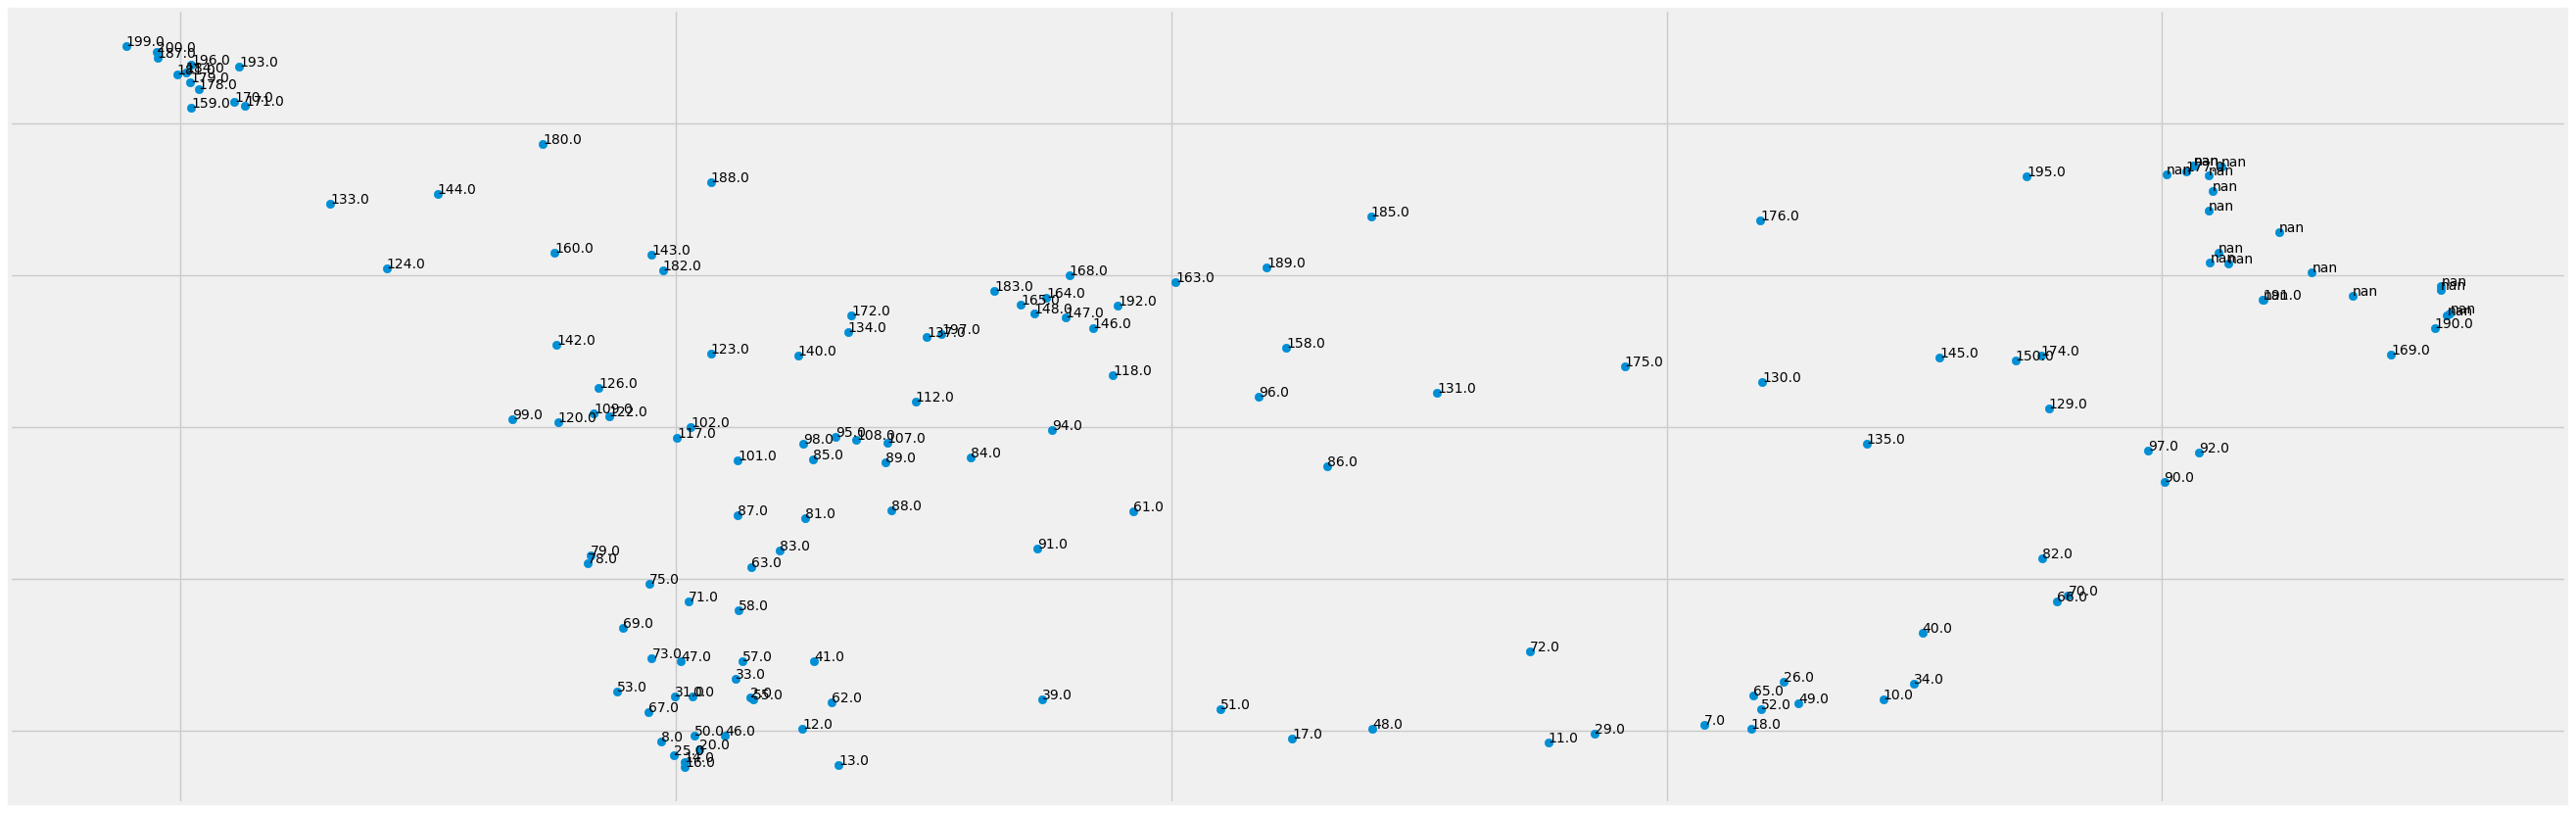

In [25]:
from time import time
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import NullFormatter  # Add this import statement

# Assuming gsb is your DataFrame containing non-numeric data

# Convert non-numeric columns to numeric using LabelEncoder
encoder = LabelEncoder()
encoded_data = gsb.apply(encoder.fit_transform)

# Perform Spectral Embedding
t0 = time()
se = manifold.SpectralEmbedding(n_components=2, n_neighbors=10)
trans_data = se.fit_transform(encoded_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

# Plot the embedded data
fig = plt.figure(figsize=(30, 10), facecolor='white')
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trans_data[0], trans_data[1])
for i in range(len(gsb)):
    plt.text(trans_data[0][i], trans_data[1][i], gsb.index[i], fontsize=10)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.show()


In [23]:
from time import time

from sklearn import manifold
from sklearn.utils import check_random_state

data = gsb
# Perform t-distributed stochastic neighbor embedding.
t0 = time()
#tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, method = 'exact')
#trans_data = tsne.fit_transform(data).T
se = manifold.SpectralEmbedding(n_components=2, n_neighbors=10)
trans_data = se.fit_transform(data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

from matplotlib.ticker import NullFormatter
fig = plt.figure(figsize=(30, 10),facecolor='white')
ax = fig.add_subplot(1, 1, 1)
plt.scatter(trans_data[0], trans_data[1])  # c=colors
for i in range(len(gsb)):
    plt.text(trans_data[0][i], trans_data[1][i], gsb.index[i], fontsize = 10)  # c=colors
#plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.show()

ValueError: could not convert string to float: 'United States'

In [26]:
gsb['rank']=range(1, len(gsb)+1)

In [28]:
# 使用 .iloc 进行切片
gsb_subset = gsb.iloc[:5]
print(gsb_subset)


       gold  silver  bronze  score         Country Code   Population  \
191.0  2235    1252    1098  12542   United States  USA  321418820.0   
NaN     838     627     584   5190             NaN  URS          NaN   
190.0   546     621     553   3979  United Kingdom  GBR   65138232.0   
90.0    476     416     404   3140           Italy  ITA   60802085.0   
66.0    408     491     497   3111          France  FRA   66808385.0   

       GDP per Capita  rank  
191.0    56115.718426     1  
NaN               NaN     2  
190.0    43875.969614     3  
90.0     29957.804315     4  
66.0     36205.568102     5  


In [29]:
# gsb[:5]

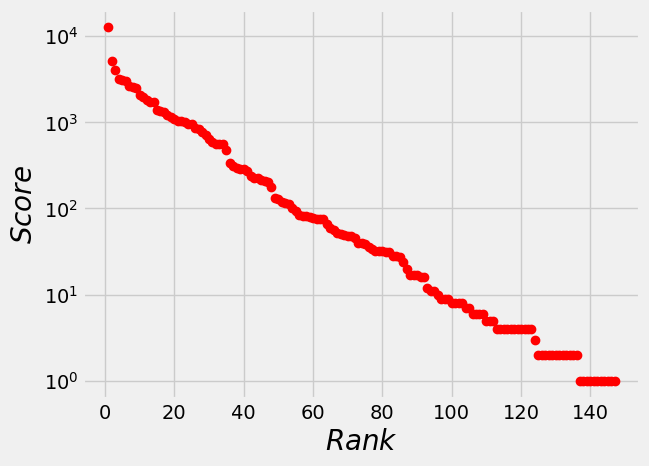

In [30]:
plt.plot(gsb['rank'], gsb.score, 'ro')
#plt.xscale('log'); 
plt.yscale('log')
plt.xlabel(r'$Rank$', fontsize = 20)
plt.ylabel(r'$Score$', fontsize = 20)
plt.show()

In [32]:
!pip install flownetwork

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 2.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for peppercorn from https://files.pythonhosted.org/packages/14/84/d8d9c3f17bda2b6f49406982546d6f6bc0fa188a43d4e3ba9169a457ee04/peppercorn-0.6-py3-none-any.whl.metadata
  Created wheel for flownetwork: filename=flownetwork-3.1.0-py2.py3-none-any.whl size=20716 sha256=d8366801da1b16e6d14d6263a6c8d0dc3c45138ecd8d1f3e0889f3d9c9d6477c
  Stored in directory: /Users/peteryh/Library/Caches/pip/wheels/ae/8b/2e/7e325556af93dddb88864c48f3ebb3a5b45005d0c68e6ef5fc
Successfully built flownetwork


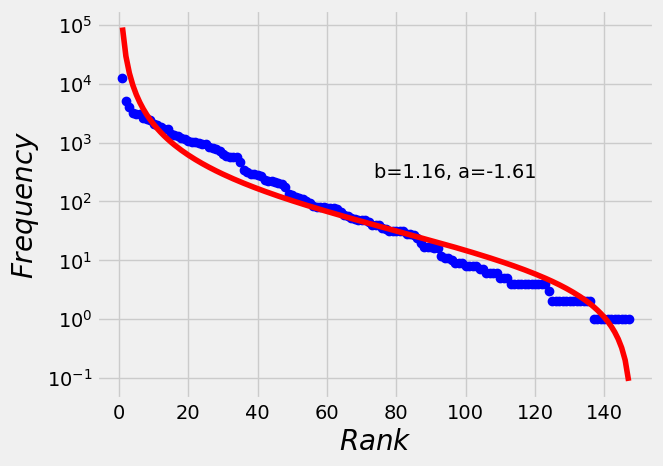

In [33]:
from flownetwork import flownetwork as fn

fn.DGBDPlot(gsb.score)

[0.1361670345513427,
 -0.2519082787600064,
 -0.000310739385968152,
 0.9626301352057971]

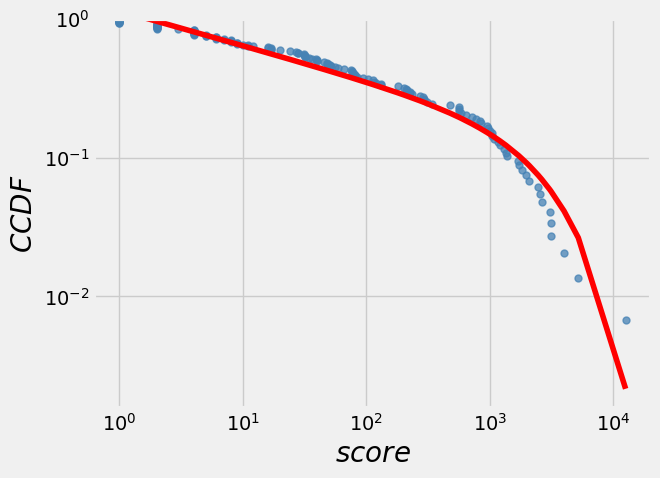

In [34]:
fn.powerLawExponentialCutOffPlot(gsb.score, '$score$', '$CCDF$')

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


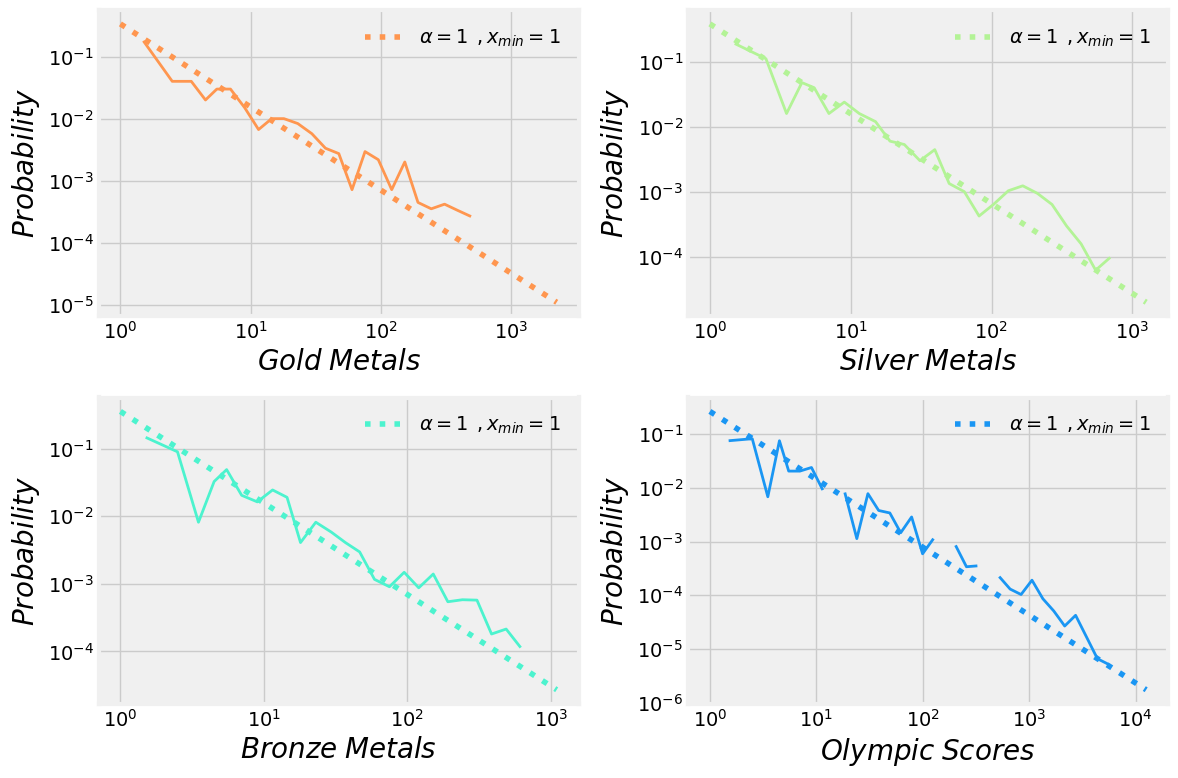

In [35]:
import matplotlib.cm as cm
cmap = cm.get_cmap('rainbow_r',6)

fig = plt.figure(figsize=(12, 8),facecolor='white')
ax = fig.add_subplot(2, 2, 1)
plotPowerlaw(gsb.gold, ax,cmap(1), '$Gold\;Metals$')
#plotCCDF(gsb.score, ax,cmap(4), '$Gold\;Metals$')
ax = fig.add_subplot(2, 2, 2)
plotPowerlaw(gsb.silver, ax,cmap(2), '$Silver\;Metals$')

ax = fig.add_subplot(2, 2, 3)
plotPowerlaw(gsb.bronze, ax,cmap(3), '$Bronze\;Metals$')

ax = fig.add_subplot(2, 2, 4)
plotPowerlaw(gsb.score, ax,cmap(4), '$Olympic\;Scores$')

plt.tight_layout()

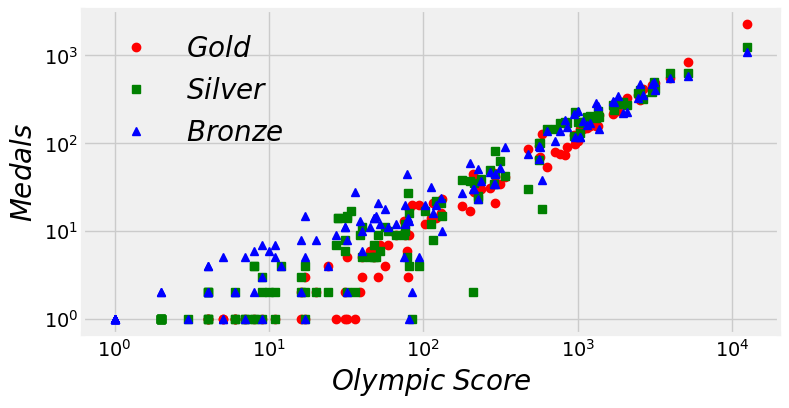

In [36]:
fig = plt.figure(figsize=(8, 4),facecolor='white')

plt.plot(gsb['score'], gsb['gold'], 'ro', label = '$Gold$')
plt.plot(gsb['score'], gsb['silver'], 'gs', label = '$Silver$')
plt.plot(gsb['score'], gsb['bronze'], 'b^', label = '$Bronze$')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$Olympic\;Score$', fontsize = 20)
plt.ylabel(r'$Medals$', fontsize = 20)
plt.legend(loc = 2, numpoints = 1, fontsize = 20, frameon = False)
plt.show()

In [37]:
gsb20 = gsb.sort_values('gold', ascending = False)[:20]

In [50]:
# Adjust figure size to a reasonable dimension
fig = plt.figure(figsize=(12, 8), facecolor='white')
plt.scatter(gsb20['score'], gsb20['gold'], s=gsb20['silver']*2, alpha=0.3)

# Adding text labels for each point
for index, row in gsb20.iterrows():
    plt.text(row['score'], row['gold'], str(index), fontsize=10)

# Set the scale of the axes
plt.xscale('log')
plt.yscale('log')

# Set the limits of the axes with a check to avoid ValueError for too large image size.
max_score = np.max(gsb20['score']) if np.max(gsb20['score']) < 2**16 else 2**16
max_gold = np.max(gsb20['gold']) if np.max(gsb20['gold']) < 2**16 else 2**16

plt.xlim((1, max_score))
plt.ylim((1, max_gold))

# Labeling the axes
plt.ylabel(r'$Gold\;Medals$', fontsize=20)
plt.xlabel(r'$Olympic\;Score$', fontsize=20)

# Display the plot
plt.show()

# Save the figure as a PDF
# Use the path '/mnt/data/output.pdf' to save the file to a location that is accessible in this environment.
plt.savefig('output.pdf', format='pdf', bbox_inches='tight')

ValueError: Image size of 1176x194156 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>

<Figure size 640x480 with 0 Axes>

In [58]:
fig = plt.figure(figsize=(12, 8), facecolor='white')  # 调整图形尺寸
plt.scatter(gsb20['score'], gsb20['gold'], s=gsb20['silver']*2, alpha=0.3)

for index, row in gsb20.iterrows():
    plt.text(row['score'], row['gold'], index)

plt.xscale('log')
plt.yscale('log')
plt.xlim((0, np.max(gsb20['score'])))
plt.ylim((0, np.max(gsb20['gold'])))
plt.ylabel(r'$Gold\;Medals$', fontsize=20)
plt.xlabel(r'$Olympic\;Score$', fontsize=20)

plt.savefig('output.png', format='png')  # 保存为 PNG 格式，分辨率为 150 dpi
plt.show()


ValueError: Image size of 1192x184917 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x800 with 1 Axes>

In [59]:
def gini_coefficient(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

In [60]:
#help(np.trapz)

In [61]:
np.linspace(0, 100, 11)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

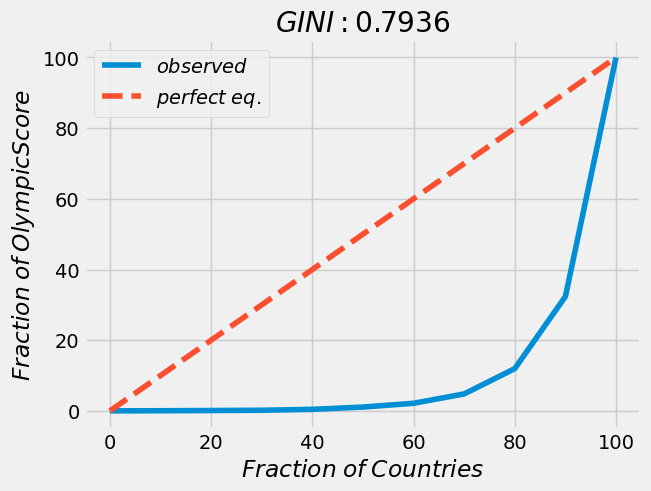

In [62]:
score_all = game.groupby(['Country']).sum()['score']
bins, result, gini_val = gini_coefficient(score_all)

plt.plot(bins, result, label="$observed$")
plt.plot(bins, bins, '--', label="$perfect\; eq.$")
plt.xlabel("$Fraction\; of\; Countries$")
plt.ylabel("$Fraction\; of \;Olympic Score$")
plt.title("$GINI: %.4f$" %(gini_val))
plt.legend(loc=0)
plt.show()

In [63]:
game['award']=1

In [64]:
country[:3]

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232


In [65]:
disciplines = game.Discipline.unique()

In [66]:
gg = game.groupby(['Discipline', 'Country']).sum()

In [70]:
ggds = gg['score']['Swimming']
ggds_max = ggds.sort_values(ascending = False).iloc[0]
gg_sum = np.sum(ggds)
gg_max  = ggds.sort_values(ascending = False)
gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
gg_max_ratio = float(gg_max_value)/gg_sum
print(gg_max_value, gg_max_ratio, gg_max_index)

2627 0.4232318350249718 USA


In [71]:
np.array(gg['award']['Croquet'])

array([8])

In [72]:
gini_coefficient(np.array(gg['award']['Cricket']))[2]

-1.0

In [74]:
for i in disciplines:
    if len(gg['award'][i]) > 10:
        print(i, gini_coefficient(gg['award'][i])[2])

Swimming 0.7506468797564688
Athletics 0.7446246906791312
Cycling Road 0.49269841269841275
Cycling Track 0.6213903743315509
Fencing 0.6893366398016119
Artistic G. 0.5397527341892535
Shooting 0.661304347826087
Tennis 0.5888513513513514
Weightlifting 0.5301184433164128
Wrestling Gre-R 0.5429872495446266
Water polo 0.4159090909090909
Archery 0.5939209726443769
Jumping 0.4110091743119266
Football 0.32351369405477615
Rowing 0.6194225721784776
Sailing 0.6323715058611362
Diving 0.6198979591836734
Boxing 0.5876957494407159
Wrestling Free. 0.6008460236886632
Hockey 0.4987341772151898
Dressage 0.4176029962546816
Eventing 0.4725075528700907
Modern Pentath. 0.5327586206896552
Basketball 0.4947628458498024
Canoe / Kayak F 0.5281798245614036
Handball 0.30791366906474815
Judo 0.5733197556008146
Volleyball 0.3643468950749464
Canoe / Kayak S 0.3688888888888889
Rhythmic G. 0.4838709677419355
Table Tennis 0.6236111111111111
Mountain Bike 0.2366666666666667
Taekwondo 0.3669642857142858
Triathlon 0.2
Canoe 

In [48]:
for i in disciplines:
    if len(gg['score'][i]) > 10:
        print i, gini_coefficient(gg['score'][i])[2]

Swimming 0.779764781698
Athletics 0.758814536046
Cycling Road 0.548517520216
Cycling Track 0.663709215799
Fencing 0.729624770401
Artistic G. 0.582544085595
Shooting 0.69337797619
Tennis 0.661027190332
Weightlifting 0.591250903832
Wrestling Gre-R 0.602675059009
Water polo 0.506969990319
Archery 0.675243902439
Jumping 0.464
Football 0.412260097393
Rowing 0.656681657565
Sailing 0.684247331616
Diving 0.666118421053
Boxing 0.648324324324
Wrestling Free. 0.668672046955
Hockey 0.552040512362
Dressage 0.51077170418
Eventing 0.516174582798
Modern Pentath. 0.582019704433
Basketball 0.628854254423
Canoe / Kayak F 0.557377819549
Handball 0.439381898455
Judo 0.632790224033
Volleyball 0.510224667584
Canoe / Kayak S 0.497619047619
Rhythmic G. 0.575115207373
Table Tennis 0.725609756098
Mountain Bike 0.39
Taekwondo 0.499166666667
Triathlon 0.364285714286
Canoe Sprint 0.448701298701
Gymnastics Artistic 0.538311688312
Wrestling Freestyle 0.474647887324


# 金牌得分与人口和GDP的关系

In [75]:
score_all['AFG']

2

In [76]:
len(score_all.index)

147

In [77]:
len(country)

201

In [79]:
medal_score = []
for i in country.Code:
    if i in score_all.index:
        medal_score.append(score_all[i])
    else:
        medal_score.append(0)

In [80]:
country['medal_score'] = medal_score

In [81]:
country[:3]

,Country,Code,Population,GDP per Capita,medal_score
0,Afghanistan,AFG,32526562.0,594.323081,2
1,Albania,ALB,2889167.0,3945.217582,0
2,Algeria,ALG,39666519.0,4206.031232,32


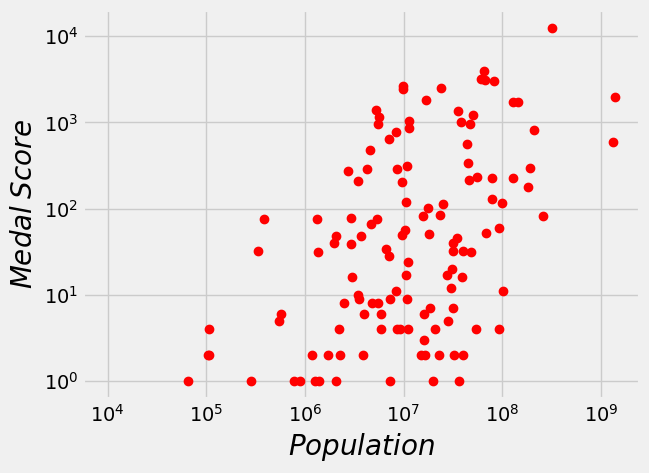

In [82]:
matplotlib.style.use('fivethirtyeight')

plt.plot(country['Population'], country['medal_score'], 'ro')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$Population$', fontsize = 20)
plt.ylabel(r'$Medal\; Score$', fontsize = 20)
plt.show()

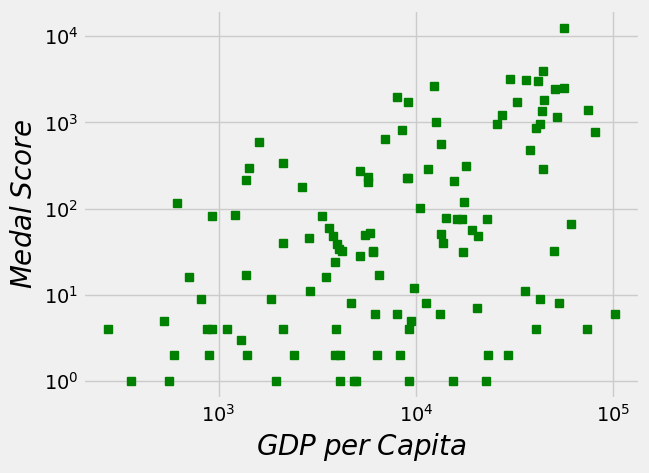

In [83]:
plt.plot(country['GDP per Capita'], country['medal_score'], 'gs')
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$GDP \;per\; Capita$', fontsize = 20)
plt.ylabel(r'$Medal\; Score$', fontsize = 20)
plt.show()

In [85]:
import statsmodels.formula.api as smf


data = pd.DataFrame({'y':country['medal_score'], \
                     'xg':country['GDP per Capita'],\
                     'xp': country['Population']
                     })

data['y_log'] = np.log(data.y + 1)
data['xg_log'] = np.log(data.xg)
data['xp_log'] = np.log(data.xp)

lm = smf.ols(formula='y ~ xg + xp', data=data).fit()
constant, beta1, beta2 = lm.params
r2=lm.rsquared
print(constant, beta1, beta2, r2)

-98.15109020903131 0.026992751517804493 2.0673185469310826e-06 0.237309791322732


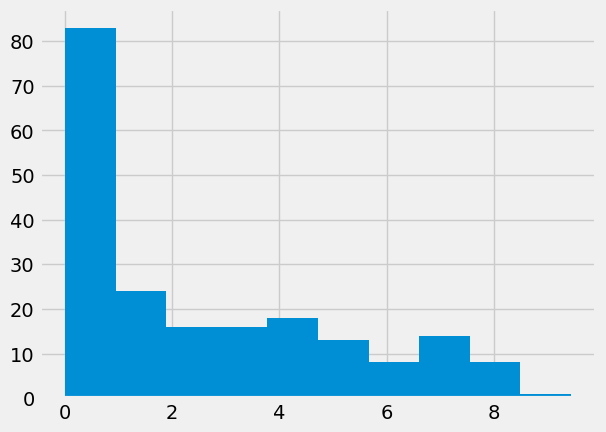

In [86]:
plt.hist(data.y_log)
plt.show()

In [87]:
data.describe()

,y,xg,xp,y_log,xg_log,xp_log
count,201.000000,176.000000,1.960000e+02,201.000000,176.000000,196.000000
mean,298.621891,12882.556131,3.722825e+07,2.448240,8.564584,15.496793
std,1075.062857,17747.141203,1.399655e+08,2.607275,1.443510,2.261906
min,0.000000,277.068309,1.022200e+04,0.000000,5.624264,9.232298
25%,0.000000,1781.096847,1.638278e+06,0.000000,7.484306,14.304578
50%,4.000000,5233.583395,7.450124e+06,1.609438,8.562851,15.823553
75%,76.000000,15494.683646,2.557454e+07,4.343805,9.648250,17.056713
max,12542.000000,101449.968168,1.371220e+09,9.436918,11.527321,21.038967


In [88]:
lm2 = smf.ols(formula='y_log ~ xg_log + xp_log + xg_log * xp_log',\
              data=data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     97.99
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           5.02e-37
Time:                        10:44:55   Log-Likelihood:                -332.80
No. Observations:                 176   AIC:                             673.6
Df Residuals:                     172   BIC:                             686.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.0040      7.773      0.258      0.797     -13.338      17.346
xg_log           -1.2513      0.873     -1.434      0.153      -2.974       0.471
xp_log           -0.5376      0.479     -1.122      0.263      -1.483       0.408
xg_log:xp_log     0.1473      0.054      2.729      0.007       0.041       0.254
==============================================================================
Omnibus:                        0.682   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.711   Jarque-Bera (JB):                0.801
Skew:                          -0.081   Prob(JB):                        0.670
Kurtosis:                       2.712   Cond. No.                     8.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
lm = smf.ols(formula='y_log ~ xg_log + xp_log', data=data).fit()
constant, beta1, beta2 = lm.params
r2=lm.rsquared
print(constant, beta1, beta2, r2)

-18.912427663605072 1.118054641570781 0.7595781697653371 0.6148877667503834


In [91]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.42e-36
Time:                        10:45:09   Log-Likelihood:                -336.53
No. Observations:                 176   AIC:                             679.1
Df Residuals:                     173   BIC:                             688.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.9124      1.311    -14.428      0.000     -21.500     -16.325
xg_log         1.1181      0.087     12.779      0.000       0.945       1.291
xp_log         0.7596      0.061     12.432      0.000       0.639       0.880
==============================================================================
Omnibus:                        3.667   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                3.019
Skew:                          -0.212   Prob(JB):                        0.221
Kurtosis:                       2.519   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

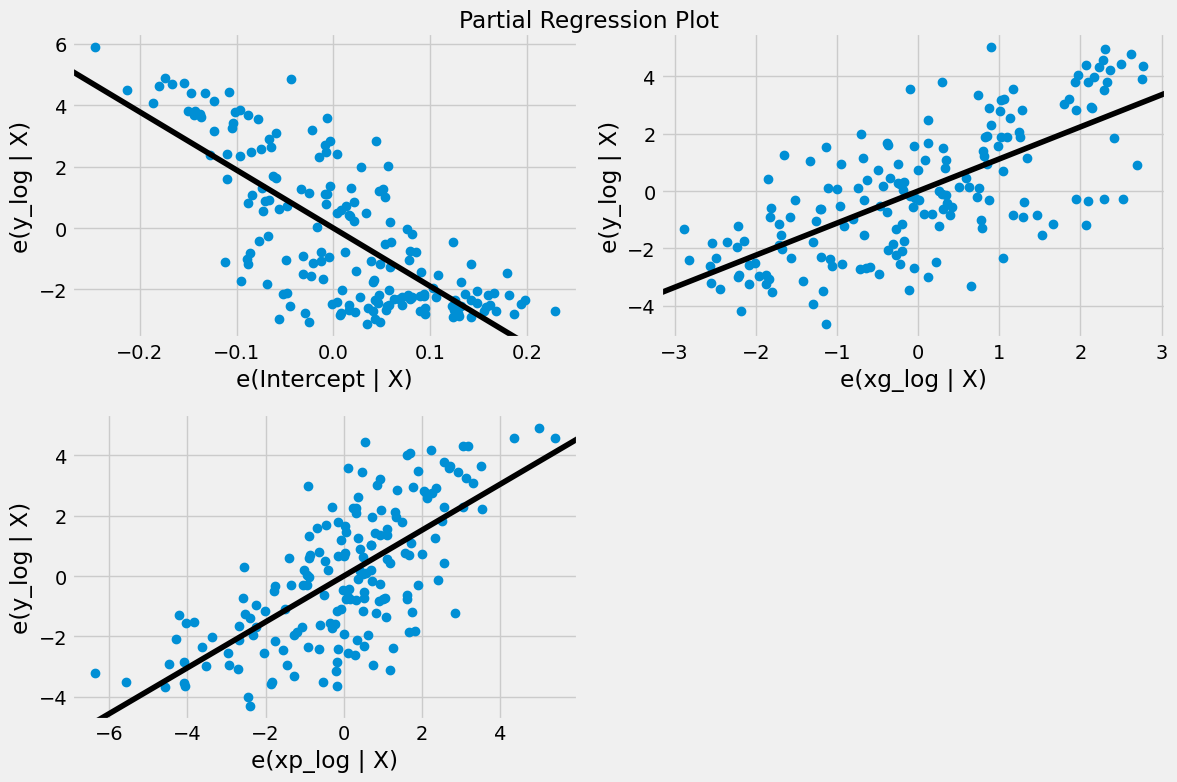

In [92]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lm, fig = fig)
plt.show()

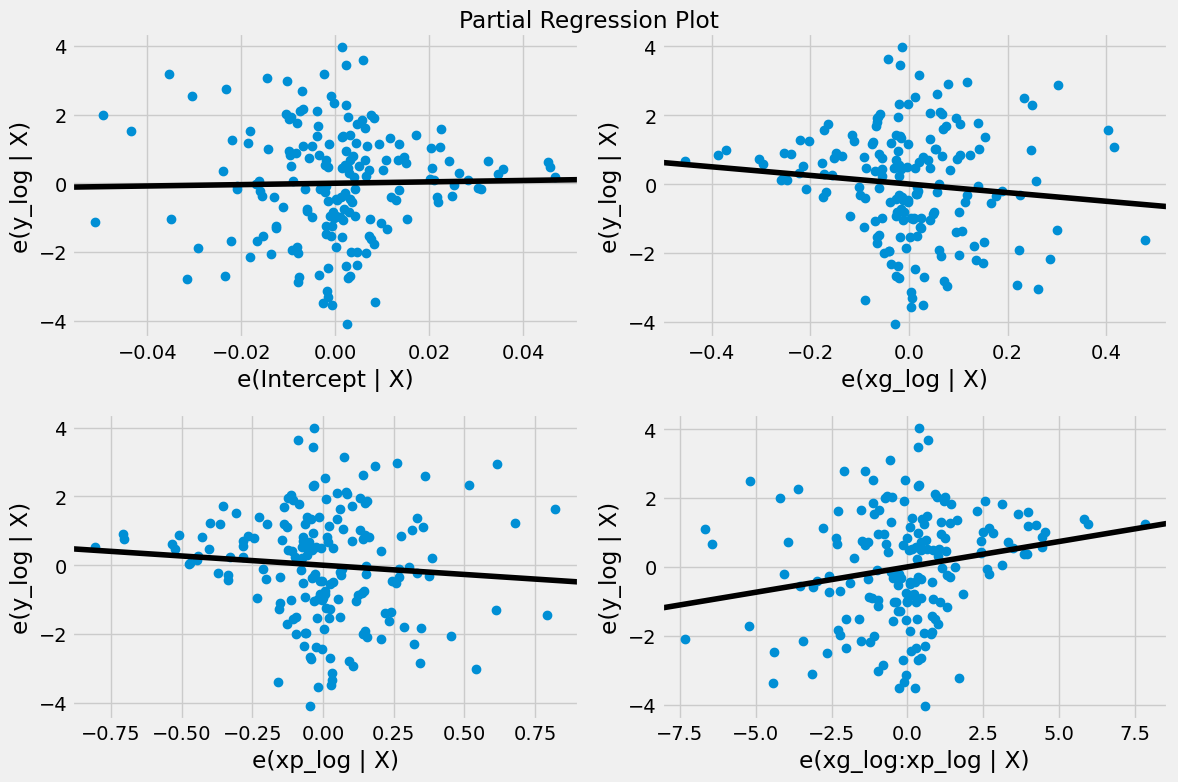

In [93]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(lm2, fig = fig)
plt.show()

# 垄断程度随时间变化

In [94]:
game[:3]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,gold,silver,bronze,score,award
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1,0,0,4,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0,1,0,2,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,0,0,1,1,1


In [95]:
years = game.Year.unique()
years

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012])

In [96]:
ggy = game.groupby(['Year', 'Country']).sum()['score']

In [97]:
ggy[1896]

Country
AUS      8
AUT     12
DEN     11
FRA     30
GBR     16
GER    116
GRE    102
HUN     13
SUI      8
USA     60
ZZX     14
Name: score, dtype: int64

In [98]:
gini = [gini_coefficient(ggy[i])[2] for i in years]

In [99]:
years

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012])

In [100]:
np.array(gini)

array([0.46512821, 0.67843296, 0.81324392, 0.69133234, 0.56039272,
       0.61761978, 0.63218225, 0.56204156, 0.6509589 , 0.65595353,
       0.64754184, 0.68561809, 0.66457226, 0.70452996, 0.68741977,
       0.66071876, 0.71833821, 0.70165508, 0.72029795, 0.72544326,
       0.72905576, 0.72022901, 0.69916551, 0.69942197, 0.68351672,
       0.72438455, 0.71583296])

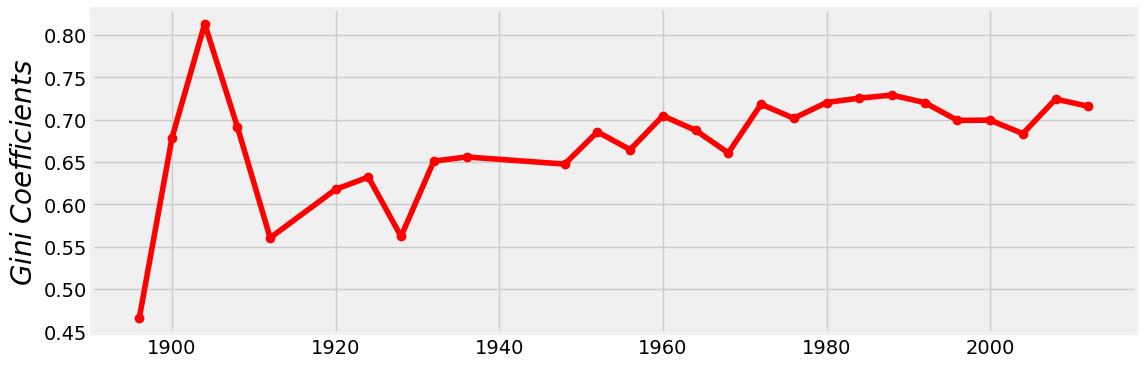

In [101]:
fig = plt.figure(figsize=(12, 4),facecolor='white')

plt.plot(years, gini, 'r-o')
plt.ylabel(r'$Gini\; Coefficients$', fontsize = 20)
plt.show()

In [102]:
gini

[0.4651282051282052,
 0.6784329563812601,
 0.813243922883487,
 0.6913323427439326,
 0.5603927203065133,
 0.6176197836166925,
 0.6321822541966426,
 0.562041564792176,
 0.6509589041095891,
 0.6559535333978702,
 0.6475418410041841,
 0.6856180856180856,
 0.6645722571290479,
 0.7045299561617145,
 0.6874197689345314,
 0.6607187630589219,
 0.7183382137628112,
 0.7016550810989738,
 0.7202979515828678,
 0.7254432624113475,
 0.7290557579153825,
 0.7202290076335878,
 0.6991655076495131,
 0.699421965317919,
 0.6835167206040993,
 0.7243845500848897,
 0.7158329611433676]

In [103]:
years

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012])

# 单项垄断者

In [104]:
game[:3]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,gold,silver,bronze,score,award
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1,0,0,4,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0,1,0,2,1
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,0,0,1,1,1


In [107]:
gg = game.groupby(['Discipline', 'Country']).sum()
for i in disciplines:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print(i, gg_max_ratio, gg_max_index)

Basque Pelota 0.6666666666666666 ESP
Cricket 0.6666666666666666 GBR
Croquet 1.0 FRA
Golf 0.9146341463414634 USA
Lacrosse 0.6436781609195402 CAN
Roque 1.0 USA
Jeu de Paume 0.5714285714285714 USA
Rackets 1.0 GBR
Water Motorspor 0.8 GBR
Vaulting 0.6944444444444444 BEL
Ice Hockey 0.5161290322580645 CAN
Table Tennis 0.6554878048780488 CHN
Softball 0.5 USA
Synchronized Swimming 0.5714285714285714 RUS
Gymnastics Rhythmic 0.6122448979591837 RUS


In [109]:
gg = game[game['Year'] > 1990].groupby(['Discipline', 'Country']).sum()
disciplines_1990 = game[game['Year'] > 1990]['Discipline'].unique()
for i in disciplines_1990:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print(i, gg_max_ratio, gg_max_index)

Diving 0.5331632653061225 CHN
Basketball 0.5014925373134328 USA
Dressage 0.5153061224489796 GER
Table Tennis 0.6853146853146853 CHN
Softball 0.5 USA
Synchronized Swimming 0.5714285714285714 RUS
Gymnastics Rhythmic 0.6122448979591837 RUS


In [110]:
game_dat = game[game['Year'] < 1990][game['Year'] < 1970]
gg = game_dat.groupby(['Discipline', 'Country']).sum()
disciplines_1990 = game_dat['Discipline'].unique()
for i in disciplines_1990:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print(i, gg_max_ratio, gg_max_index)

Basque Pelota 0.6666666666666666 ESP
Cricket 0.6666666666666666 GBR
Croquet 1.0 FRA
Golf 0.9146341463414634 USA
Diving 0.6710526315789473 USA
Lacrosse 0.6436781609195402 CAN
Roque 1.0 USA
Jeu de Paume 0.5714285714285714 USA
Rackets 1.0 GBR
Water Motorspor 0.8 GBR
Vaulting 0.6944444444444444 BEL
Ice Hockey 0.5161290322580645 CAN
Basketball 0.5872756933115824 USA
Handball 0.5906040268456376 GER
Volleyball 0.5 URS


In [111]:
game_dat = game[game['Year'] < 1970][game['Year'] > 1950]
gg = game_dat.groupby(['Discipline', 'Country']).sum()
disciplines_1990 = game_dat['Discipline'].unique()
for i in disciplines_1990:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print (i, gg_max_ratio, gg_max_index)

Diving 0.6571428571428571 USA
Swimming 0.5 USA
Basketball 0.5740740740740741 USA
Volleyball 0.5 URS


In [112]:
game_dat = game[game['Year'] < 1950][game['Year'] > 1930]
gg = game_dat.groupby(['Discipline', 'Country']).sum()
disciplines_1990 = game_dat['Discipline'].unique()
for i in disciplines_1990:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print (i, gg_max_ratio, gg_max_index)

Diving 0.9523809523809523 USA
Water polo 0.5123152709359606 HUN
Hockey 0.6134969325153374 IND
Modern Pentath. 0.5238095238095238 SWE
Basketball 0.6187845303867403 USA
Handball 0.5906040268456376 GER
Polo 0.5714285714285714 ARG


In [113]:
game_dat = game[game['Year'] < 1930][game['Year'] > 1910]
gg = game_dat.groupby(['Discipline', 'Country']).sum()
disciplines_1990 = game_dat['Discipline'].unique()
for i in disciplines_1990:
    ggds = gg['score'][i]
    ggds_max = ggds.sort_values(ascending = False).iloc[0]
    gg_sum = np.sum(ggds)
    gg_max  = ggds.sort_values(ascending = False)
    gg_max_value, gg_max_index = gg_max.iloc[0], gg_max.index[0]
    gg_max_ratio = float(gg_max_value)/gg_sum
    if gg_max_ratio >= .5:
        print (i, gg_max_ratio, gg_max_index)

Diving 0.5555555555555556 USA
Dressage 0.5217391304347826 SWE
Modern Pentath. 0.9642857142857143 SWE
Sailing 0.5168 NOR
Archery 0.6551724137931034 BEL
Vaulting 0.6944444444444444 BEL
Ice Hockey 0.5161290322580645 CAN
Rugby 0.6153846153846154 USA


In [120]:
!pip install pyecharts
#from echarts import Echart, Legend, Bar, Axis
#from IPython.display import HTML

  Obtaining dependency information for pyecharts from https://files.pythonhosted.org/packages/2a/7e/bd0d5e87d4077c89294f48e2452bb64677f7183ba688d29220645193c197/pyecharts-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/3d/c4/a32f4bf44faf95accbbd5d7864ddef9e289749a8efbc3adaad4a4671779a/prettytable-3.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for simplejson from https://files.pythonhosted.org/packages/bc/eb/2bd4a6ec98329158f6855520596e9f2e521e2239e292d43fe1c58cf83a9b/simplejson-3.19.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.3/146.3 kB 3.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.7 MB/s eta 0:00:00


In [124]:
from pyecharts.charts import Bar
from pyecharts import options as opts

# Create a bar chart
bar = (
    Bar()
    .add_xaxis(["Nov", "Dec", "Jan", "Feb"])  # Adding X-axis data
    .add_yaxis("GDP", [2, 3, 4, 5])  # Adding Y-axis data along with the label
    .set_global_opts(
        title_opts=opts.TitleOpts(title="GDP", subtitle="This is a fake chart"),  # Setting title
        legend_opts=opts.LegendOpts(is_show=True)  # Display the legend
    )
)

# Render the chart directly in the notebook
bar.render_notebook()

In [125]:
chart.plot()

NameError: name 'chart' is not defined